In [1]:
import numpy as np
import matplotlib.pyplot as plt

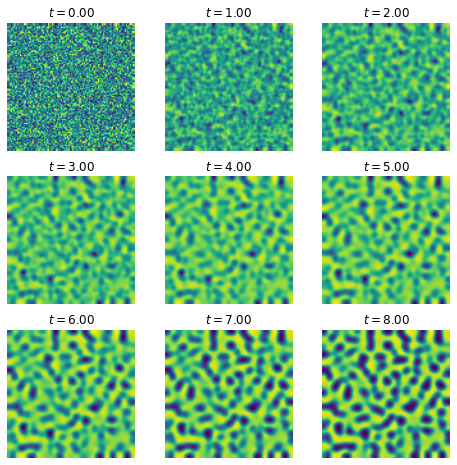

In [5]:
a = 2.8e-4
b = 5e-3
tau = 0.1
k = -0.005

size = 100 # size of 2D grid
dx = 2. / size # space step

T = 9.0 # total time
dt = .001 # time step
n = int(T / dt) #number of iterations

# Initialize u and v

U = np.random.rand(size,size)
V = np.random.rand(size,size)


def laplacian(Z):
    Ztop = Z[0:-2,1:-1]
    Zleft = Z[1:-1,0:-2]
    Zbottom = Z[2:,1:-1]
    Zright = Z[1:-1,2:]
    Zcenter = Z[1:-1,1:-1]
    return((Ztop + Zleft + Zbottom + Zright - 4*Zcenter)/dx**2)

def show_patterns(U,ax=None):
    ax.imshow(U,cmap='viridis',interpolation='bilinear',extent=[-1,1,-1,1])
    ax.set_axis_off()

fig,axes = plt.subplots(3,3,figsize=(8,8))
step_plot = n // 9

for i in range(n):
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    Uc = U[1:-1,1:-1]
    Vc = V[1:-1,1:-1]
    U[1:-1,1:-1],V[1:-1,1:-1] = Uc + dt*(a*deltaU + Uc - Uc**3 - Vc + k),Vc + dt*(b*deltaV + Uc - Vc)/tau
    

    for Z in (U,V):
        Z[0,:] = Z[1, :]
        Z[-1, :] = Z[-2, :]
        Z[:,0] = Z[:,1]
        Z[:,-1] = Z[:,-2]
    
    if i % step_plot == 0 and i < 9 * step_plot:
        ax = axes.flat[i // step_plot]
        show_patterns(U,ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')